<a href="https://colab.research.google.com/github/melissamelton/GSB521_CongressionalData/blob/main/Engineering_and_Science_Education_Among_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By Melissa Melton & Annika Bertelsen for GSB 521**

During Thursday's lecture, we observed that there were significantly larger proportions of households earning over $200k per year in Democratic congressional districts compared to the Republican congressional districts. This led us to wonder more about what might be causing this difference in household incomes for the two political affilations. To analyze this income difference, we decided to focus on the differences in the educational paths taken by people in different states. Rather than looking at political affilation by congressional district, we have utilized American Community Survey Data for political affilation and Bachelor's Degrees by state. This analysis aims to observe how people's pursuit of a Bachelor's Degree in science and engineering, which are often more lucrative fields, varies among states with Democrat versus Republican leanings.

ACS has recorded data of the total population over the age of 25 with a Bachelor's Degree or higher for each state, as well as broken out the graduates by Degree category. Focusing on the Science and Engineering degree category by state, we will later use this data alongside the Pew Research Center's records for political affiliations by state.


ACS Bachelor's Degree Data Source: https://data.census.gov/table?q=education&g=0400000US01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&tid=ACSST1Y2021.S1502&moe=false&tp=true

Hypothesis: Prior to looking at any data tables or analyzing the two data sources together, our hypothesis is that the states with a high proportion of the total population above 25 with a Bachelor's degree in Science or Engineering will likely be states that have a majority Democratic affiliation. This hypothesis is based off the findings from Pierce's analysis that showed higher earnings in Democratic congressional districts. With the idea that Science and Engineering degrees may lead to higher earnings than other Bachelor's degree categories such as Arts and Humanities, we are hypothesizing that states with high proportions of Science and Engineering degrees may be associated with the Democratic affiliated states.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns

Read in the dataset from Github, then select only the rows pertaining to the percent of the total population above 25 with Bachelor's degrees who received their degrees in science or engineering.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/melissamelton/GSB521_CongressionalData/main/ACSST1Y2021.S1502-2023-01-21T052740.csv')
# preview of the data
df.head(n=6)

,Label (Grouping),Total population 25 years and over with a Bachelor's degree or higher,Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering,Total population 25 years and over with a Bachelor's degree or higher!!Science and Engineering Related Fields,Total population 25 years and over with a Bachelor's degree or higher!!Business,Total population 25 years and over with a Bachelor's degree or higher!!Education,"Total population 25 years and over with a Bachelor's degree or higher!!Arts, Humanities and Others",Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!25 to 39 years,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!25 to 39 years!!Science and Engineering,...,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!40 to 64 years!!Science and Engineering Related Fields,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!40 to 64 years!!Business,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!40 to 64 years!!Education,"Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!40 to 64 years!!Arts, Humanities and Others",Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Science and Engineering,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Science and Engineering Related Fields,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Business,Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Education,"Total population 25 years and over with a Bachelor's degree or higher!!DETAILED AGE!!65 years and over!!Arts, Humanities and Others"
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estimate,"946,766","286,328","99,593","214,901","146,131","199,813",NaN,"283,847","100,293",...,"50,772","114,135","65,137","92,298","215,245","60,703","17,386","44,422","55,358","37,376"
3,Margin of Error,"±16,284","±10,106","±6,355","±8,088","±7,370","±8,734",NaN,"±9,093","±5,498",...,"±4,233","±6,376","±5,234","±5,727","±8,098","±3,936","±2,628","±3,581","±4,098","±3,137"
4,Percent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Estimate,(X),30.2%,10.5%,22.7%,15.4%,21.1%,NaN,(X),35.3%,...,11.3%,25.5%,14.6%,20.6%,(X),28.2%,8.1%,20.6%,25.7%,17.4%


In [ ]:
# iterate through the rows to obtain each state's percentage of the 25+ year-old, university-educated population who obtained a BA in science or engineering
pct_scieng = df.iloc[5::19, 2] 

# iterate through the rows to obtain the state names
state_names = df.iloc[::19, 0]

# combine percentage data with state names
df = pd.concat([state_names.reset_index(drop=True), 
           pct_scieng.reset_index(drop=True)], axis = 1)

df.columns = ['State', 'Percentage_Science_or_Engineering_BA'] # rename columns

# format data so that there are no percentages and make numeric
df['Percentage_Science_or_Engineering_BA'] = df['Percentage_Science_or_Engineering_BA'].str.rstrip('%').astype(float)

df.head()

,State,Percentage_Science_or_Engineering_BA
0,Alabama,30.2
1,Alaska,41.9
2,Arizona,34.3
3,Arkansas,28.1
4,California,42.6


We have data for the 50 states, D.C., and Puerto Rico. Now we need to obtain data regarding their political leanings, then merge it with the ACS data.

This table from Pew Research Center comes from one of their own studies which sampled hundreds of Americans in each state, and contains the breakdown of what percentage identified as Democrat and what percentage identified as Democrat: https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/

We will use the requests package to read in this table.

In [ ]:
# read in the table from the website and convert it to a dataframe
url = 'https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/'
html = requests.get(url).content
df2 = pd.read_html(html)[0]

# keep relevant columns only
df2 = df2[['State', 'Republican/lean Rep.', 'Democrat/lean Dem.']]

# create a new column for use in identifying majority leaning
df2.insert(3,"Political_Leaning", " ")

df2.head()

,State,Republican/lean Rep.,Democrat/lean Dem.,Political_Leaning
0,Alabama,52%,35%,
1,Alaska,39%,32%,
2,Arizona,40%,39%,
3,Arkansas,46%,38%,
4,California,30%,49%,


Loop through each row of party affiliation data to determine whether state is majority Republican or majority Democrat.

In [ ]:
df2['Political_Leaning'] = df2.apply(lambda x: 'R' if x['Republican/lean Rep.'] > 
                                     x['Democrat/lean Dem.'] else 'D' ,
                                     axis=1)
df2.head()

,State,Republican/lean Rep.,Democrat/lean Dem.,Political_Leaning
0,Alabama,52%,35%,R
1,Alaska,39%,32%,R
2,Arizona,40%,39%,R
3,Arkansas,46%,38%,R
4,California,30%,49%,D


Merge the two datasets so we have state, percentage of age 25+ college-educated adults with a Bachelor's in science or engineering, and the state's political leaning.

In [ ]:
merged_df = pd.merge(df, df2, on=["State"])
merged_df = merged_df[["State", "Percentage_Science_or_Engineering_BA", "Political_Leaning"]]
merged_df.head()

,State,Percentage_Science_or_Engineering_BA,Political_Leaning
0,Alabama,30.2,R
1,Alaska,41.9,R
2,Arizona,34.3,R
3,Arkansas,28.1,R
4,California,42.6,D


In [ ]:
merged_df['Political_Leaning'].value_counts()

D    29
R    22
Name: Political_Leaning, dtype: int64

After our merge we are left with data for the 50 states and D.C. Now, we will create a boxplot using Seaborn to demonstrate the variation in the percentage of the 25+, BA or higher population with a BA in science or engineering, by states' political affiliation.

[Text(0, 0.5, '% of BA degrees'),
 Text(0.5, 0, 'Political Leaning'),
 Text(0.5, 1.0, 'Boxplot of Percentage of Bachelors Degrees in Science or Engineering\n Among Republican and Democrat States')]

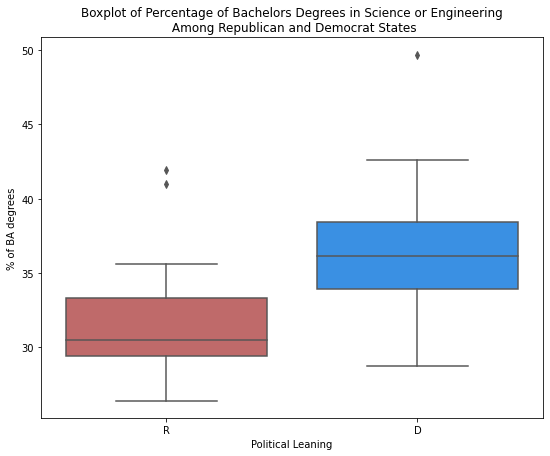

In [ ]:
palette = {'R': 'indianred', 
           'D': 'dodgerblue'}

plt.figure(figsize=(9, 7))
bplot = sns.boxplot(x= 'Political_Leaning', y = 'Percentage_Science_or_Engineering_BA',
            data = merged_df,
            palette = palette)
bplot.set(xlabel = 'Political Leaning', 
          ylabel = '% of BA degrees',
          title = 'Boxplot of Percentage of Bachelors Degrees in Science or Engineering\n Among Republican and Democrat States')



It looks like this boxplot confirms our hypothesis that Democrat-leaning states tend to have a greater proportion of adults who received their BA in science or engineering. For the Democrat states, the median looks to be about 37%, while for the Republican states, it is about 30.5%.